In [3]:
import numpy as np
import pandas as pd


In [54]:
prost= pd.read_csv('data\PROSTITUTION.csv')
prost.head()

,Unnamed: 0,cas,curr_off_lit,fda,bam,curr_off,curr_l_d,def_rac,def_sex,def_dob,...,judge,offcat,location,length,ageatfiling,num,date_unit,sentence_length,com_off,com_off_lit
0,1,1.246928e+11,PROSTITUTION,2010-01-06,15000.0,400405,FS,W,F,1970-08-19,...,Herb Ritchie,Prostitution,HCJ,90 DAYS,39.0,90.0,DAYS,90.0,400405.0,PROSTITUTION
1,2,1.246998e+11,PROSTITUTION,2010-01-06,15000.0,400405,FS,W,F,1975-06-07,...,George Powell,Prostitution,STATE JAIL,6 MONTHS,34.0,360.0,DAYS,360.0,400405.0,PROSTITUTION
2,3,1.247063e+11,PROSTITUTION,2010-01-06,15000.0,400405,FS,B,F,1968-07-05,...,Kelli Johnson,Prostitution,STATE JAIL,6 MONTHS,41.0,360.0,DAYS,360.0,400405.0,PROSTITUTION
3,4,1.247082e+11,PROSTITUTION,2010-01-07,15000.0,400405,FS,W,F,1969-09-30,...,Jeannine Barr,Prostitution,STATE JAIL,6 MONTHS,40.0,360.0,DAYS,360.0,400405.0,PROSTITUTION
4,5,1.247085e+11,PROSTITUTION,2010-01-07,15000.0,400405,FS,B,F,1963-05-03,...,Denise Collins,Prostitution,HCJ,180 DAYS,46.0,180.0,DAYS,180.0,400405.0,PROSTITUTION


In [44]:
prost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15733 entries, 0 to 15732
Data columns (total 28 columns):
Unnamed: 0         15733 non-null int64
cas                15733 non-null float64
curr_off_lit       15733 non-null object
fda                15733 non-null object
bam                15158 non-null float64
curr_off           15733 non-null int64
curr_l_d           15733 non-null object
def_rac            15717 non-null object
def_sex            15720 non-null object
def_dob            15730 non-null object
aty_coc            14266 non-null object
aty_coc_lit        14266 non-null object
disposition        15733 non-null object
sentence           12124 non-null object
dispdt             15733 non-null int64
comp_agency        15721 non-null object
Latitude           15109 non-null float64
Longitude          15733 non-null float64
judge              15733 non-null object
offcat             15733 non-null object
location           12123 non-null object
length             12124 non-

In [55]:
#how do I drop the time from returning?
prost.fda = pd.to_datetime(prost.fda)
prost.def_dob = pd.to_datetime(prost.def_dob)
#prost.dispdt = pd.to_datetime(prost.dispdt, yearfirst=True)
#^^ turns all dates to 1970-1-1

In [57]:
#drop duplicate "sentence length col"
prost = prost.T.drop_duplicates().T

In [58]:
#drop unnecessary columns
prost = prost.drop(columns=['Unnamed: 0', 'curr_off', 'curr_l_d', 'aty_coc', 'offcat'])

In [59]:
#drop 'Longitude' and 'Latitude'
prost = prost.drop(columns=['Longitude', 'Latitude'])

In [60]:
prost.head()

,cas,curr_off_lit,fda,bam,def_rac,def_sex,def_dob,aty_coc_lit,disposition,sentence,dispdt,comp_agency,judge,location,length,ageatfiling,num,date_unit,com_off,com_off_lit
0,1.24693e+11,PROSTITUTION,2010-01-06 00:00:00,15000,W,F,1970-08-19 00:00:00,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,90 DAYS HCJ,1970-01-01 00:00:00.020100107,HOUSTON POLICE DEPARTMENT,Herb Ritchie,HCJ,90 DAYS,39,90,DAYS,400405,PROSTITUTION
1,1.247e+11,PROSTITUTION,2010-01-06 00:00:00,15000,W,F,1975-06-07 00:00:00,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,6 MONTHS STATE JAIL,1970-01-01 00:00:00.020100108,HOUSTON POLICE DEPARTMENT,George Powell,STATE JAIL,6 MONTHS,34,360,DAYS,400405,PROSTITUTION
2,1.24706e+11,PROSTITUTION,2010-01-06 00:00:00,15000,B,F,1968-07-05 00:00:00,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,6 MONTHS STATE JAIL,1970-01-01 00:00:00.020100126,HOUSTON POLICE DEPARTMENT,Kelli Johnson,STATE JAIL,6 MONTHS,41,360,DAYS,400405,PROSTITUTION
3,1.24708e+11,PROSTITUTION,2010-01-07 00:00:00,15000,W,F,1969-09-30 00:00:00,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,6 MONTHS STATE JAIL,1970-01-01 00:00:00.020100108,HOUSTON POLICE DEPARTMENT,Jeannine Barr,STATE JAIL,6 MONTHS,40,360,DAYS,400405,PROSTITUTION
4,1.24709e+11,PROSTITUTION,2010-01-07 00:00:00,15000,B,F,1963-05-03 00:00:00,APPOINTED DEFENSE ATTORNEY,GUILTY PLEA-NO JURY,180 DAYS HCJ,1970-01-01 00:00:00.020100111,HOUSTON POLICE DEPARTMENT,Denise Collins,HCJ,180 DAYS,46,180,DAYS,400405,PROSTITUTION


In [16]:
prost.disposition.value_counts()

CONVICTION-PLEA OF GUILTY                          7832
GUILTY PLEA-NO JURY                                2557
DISMISSED                                          2443
DEFERRED ADJUD OF GUILT                            1323
DEFERRED ADJUDICATION TERMINATED                    862
DEF ADJ GLT ADJUDICATED                             154
LESSER OFF. GUILTY PLEA - NO JURY                   139
DISM OTHER                                          132
CONVICTION-NOLO CONTENDERE                           62
UNSATISFACTORY TERMINATION                           38
DISMISSED OTHER                                      38
DISMISSED DEFENDANT CONVICTED ON ANOTHER CHARGE      31
ACQUITTAL BY JURY                                    24
CONVICTION BY JURY                                   22
PROBATION TERMINATED                                 17
PROBATION BY JURY TRIAL                              14
NO BILLED                                            11
PROBATION-PLEA OF GUILTY                        

In [65]:
# Convert the categorical inputs of some features/columns in df to numerical nature
from sklearn.preprocessing import LabelEncoder
new = pd.DataFrame()

numeric = LabelEncoder()
new['sex']=numeric.fit_transform(prost['def_sex'].astype('str'))
new['disp']= numeric.fit_transform(prost['disposition'].astype('str'))

#copy numeric columns from "prost" to "new"
#new['age']=prost['ageatfiling']

In [67]:
new.head()

,sex,disp
0,0,18
1,0,18
2,0,18
3,0,18
4,0,18


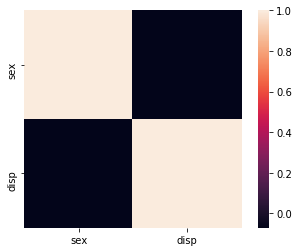

In [69]:
import seaborn as sns
#visualized 'heatmap' of correlations between the variables 
corrmat= new.corr(method = 'spearman')
sns.heatmap(corrmat, square=True)

In [72]:
from sklearn.linear_model import LinearRegression
X = new.drop('disp', axis=1)
y = new.disp
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_ 

reg.predict(X)


array([ 9.0904016,  9.0904016,  9.0904016, ...,  9.0904016,  9.0904016,
        9.0904016])

In [61]:
from sklearn.linear_model import LinearRegression
X = prost.def_sex
y = prost.disposition
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_ 

reg.predict()


ValueError: could not convert string to float: 'F'

In [25]:
raw = pd.read_table('data\DATA - Jenkins Monthly Disposition Reports.txt')

In [26]:
raw.head()

,cdi cas fda ins cad crt cst dst bam curr_off curr_off_lit curr_l_d com_off com_off_lit com_l_d gj_off gj_off_lit gj_l_d nda cnc rea def_nam def_spn def_rac def_sex def_dob def_stnum def_stnam def_cty def_st def_zip aty_nam aty_spn aty_coc aty_coc_lit comp_nam comp_agency off_rpt_num dispdt disposition sentence
0,---- ------------ -------- ---- ---- ---- ----...
1,002 025237901010 19690206 MRP DISP 004 C ...
2,002 025475501010 19690328 MIN DISP 004 C ...
3,002 026934001010 19700120 MRP DISP 004 C ...
4,002 026934001010 19700120 MRP DISP 004 C ...
